**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# import data 2C_weka.csv for 2 Class Classifcation.


In [44]:
df = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [45]:
#No. of rows
print('No. of rows = ', df.shape[0])
print('No. of columns = ', df.shape[1])

No. of rows =  310
No. of columns =  7


In [46]:
#Dtypes of columns
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [47]:
#Describe
df.describe(include='all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


### Inferences
1. There is no missing data  
2. All columns except the class are of dtype float64 
3. All the features are continous numerical attributes 

# Encode the Class variable to integer.

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

In [49]:
df['class'].dtypes

dtype('int32')

### We have now converted our Class variable to int32  
This is the legend:
1. Abnormal = 0
2. Normal = 1

0    210
1    100
Name: class, dtype: int64


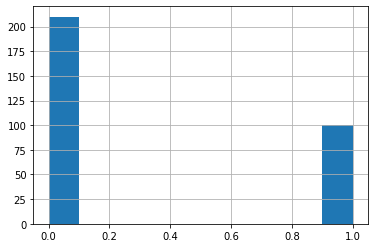

In [50]:
#Checking the distribution of our target variable
print(df['class'].value_counts())
df['class'].hist()

We see that the distribution of the target (class) is skewed towards 'abnormal' with a 66-33 split.

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [51]:
#Getting the list of features
X = df.iloc[:,0:df.shape[1]-1]

In [52]:
#Getting the target variable
y = df['class']

# Normalize your Data (X) to get values between 0 to 1.

In [53]:
#Normalizing using zscores
X = X.apply(zscore)

# Split the dat as train and test with a ratio of 70:30.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [88]:
print('No. of rows in my training set = ', X_train.shape[0])
print('No. of rows in my testing set = ', X_test.shape[0])

No. of rows in my training set =  217
No. of rows in my testing set =  93


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [95]:
#Initializing the KNN model variable
#Try with k = 3
KNN = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', metric = 'euclidean')

#Fitting the training set
KNN.fit(X_train, y_train)

#Predicting the y
y_pred = KNN.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [96]:
#Using accuracy score
accuracy_score(y_test, y_pred)

0.8064516129032258

In [91]:
KNN.score(X_test, y_test)

0.7741935483870968

In [92]:
#Getting accuracy
print('Training accuracy = ', KNN.score(X_train, y_train))
print('Testing accuracy = ', KNN.score(X_test,y_test))

Training accuracy =  0.9170506912442397
Testing accuracy =  0.7741935483870968


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [93]:
#Creating a for loop
accuracy_test = []
accuracy_train = []
for k in range(1,20):
    #Initializing the model
    KNN = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric = 'euclidean')
    #Fitting the training set
    KNN.fit(X_train, y_train)
    #Predicting the y
    y_pred_test = KNN.predict(X_test)
    #Getting the accuracy score
    accuracy_test.append(KNN.score(X_test, y_test))
end = datetime.now()
print('Best k value is %i with a max accuracy of %.3f '%(accuracy_test.index(max(accuracy_test))+1, max(accuracy_test)))

Best k value is 6 with a max accuracy of 0.806 


Plotting the k-values with their accuracies

Text(6, 0.8064516129032258, '-----------Max K Value----------')

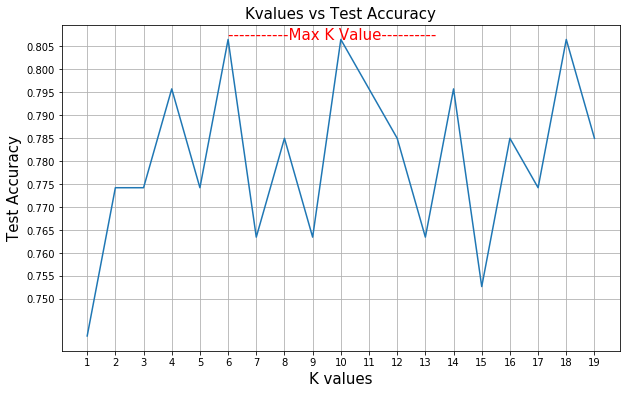

In [97]:
#Plotting k-values with their test accuracies
plt.figure(figsize = (10,6))
plt.xlabel('K values', fontsize = 15)
plt.ylabel('Test Accuracy', fontsize = 15)
plt.grid(True)
plt.title('Kvalues vs Test Accuracy', fontsize = 15)
plt.xticks(np.arange(1,20))
plt.yticks(np.arange(0.75,0.90, 0.005))
plt.plot(np.arange(1,20),accuracy_test)
plt.text(6,max(accuracy_test), '-----------Max K Value----------', fontsize = 15, color = 'red')

# Conclusion: 
### Optimal k-value for this dataset is 6 => Accuracy = 80.6%

------------------------------------------------------------------------------------------------------------------

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [98]:
df2 = pd.read_csv('3Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [99]:
#No. of rows
print('No. of rows = ', df2.shape[0])
print('No. of columns = ', df2.shape[1])

No. of rows =  310
No. of columns =  7


In [100]:
#Dtypes of columns
df2.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [101]:
#Describe
df2.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


### Inferences
1. There is no missing data  
2. All columns except the class are of dtype float64 
3. All the features are continous numerical attributes 
4. The target class has three distinct attributes

# Encode the Class variable to integer.

In [102]:
df2['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['class'] = labelencoder.fit_transform(df2['class'])

In [104]:
df2['class'].dtypes

dtype('int32')

In [105]:
labelencoder.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

### We have now converted our Class variable to int32  
This is the legend:
1. Hernia = 0
2. Normal = 1
3. Spondylolisthesis = 2

2    150
1    100
0     60
Name: class, dtype: int64


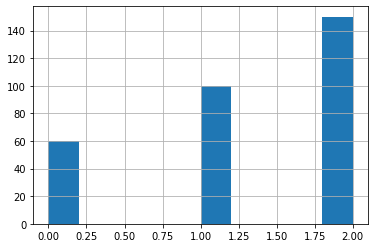

In [106]:
#Checking the distribution of our target variable
print(df2['class'].value_counts())
df2['class'].hist()

We see that the distribution of the target (class) is skewed towards 'Spondylolisthesis' with a 3:5:7 split.

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [107]:
#Getting the list of features
X = df2.iloc[:,0:df.shape[1]-1]

In [108]:
#Getting the target variable
y = df2['class']

# Normalize your Data (X) to get values between 0 to 1.

In [109]:
#Normalizing using zscores
X = X.apply(zscore)

# Split the dat as train and test with a ratio of 70:30.

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [121]:
print('No. of rows in my training set = ', X_train.shape[0])
print('No. of rows in my testing set = ', X_test.shape[0])

No. of rows in my training set =  217
No. of rows in my testing set =  93


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [122]:
#Initializing the KNN model variable
KNN = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', metric = 'euclidean')

#Fitting the training set
KNN.fit(X_train, y_train)

#Predicting the y
y_pred = KNN.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [123]:
#Getting accuracies
print('Training accuracy = ', KNN.score(X_train, y_train))
print('Testing accuracy = ', KNN.score(X_test,y_test))

Training accuracy =  0.9124423963133641
Testing accuracy =  0.7741935483870968


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [124]:
#Creating a for loop
accuracy_test = []
accuracy_train = []
for k in range(1,20):
    #Initializing the model
    KNN = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric = 'euclidean')
    #Fitting the training set
    KNN.fit(X_train, y_train)
    #Predicting the y
    y_pred_test = KNN.predict(X_test)
    #Getting the accuracy score
    accuracy_test.append(KNN.score(X_test, y_test))
end = datetime.now()
print('Best k value is %i with a max accuracy of %.3f '%(accuracy_test.index(max(accuracy_test))+1, max(accuracy_test)))

Best k value is 4 with a max accuracy of 0.806 


Plotting the k-values with their accuracies

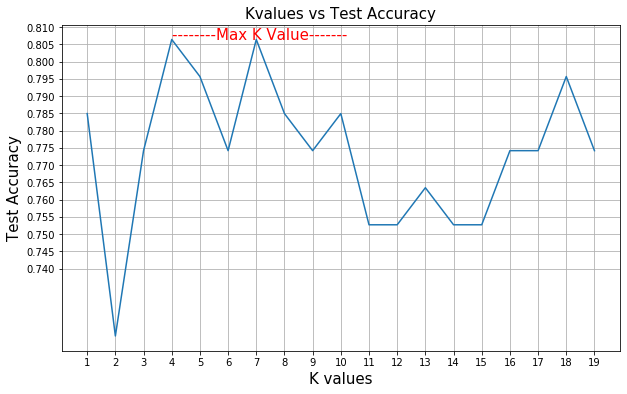

In [127]:
#Plotting k-values with their test accuracies
plt.figure(figsize = (10,6))
plt.xlabel('K values', fontsize = 15)
plt.ylabel('Test Accuracy', fontsize = 15)
plt.grid(True)
plt.title('Kvalues vs Test Accuracy', fontsize = 15)
plt.xticks(np.arange(1,20))
plt.yticks(np.arange(0.74,0.90, 0.005))
plt.text(4,max(accuracy_test), '--------Max K Value-------', fontsize = 15, color = 'red')
plt.plot(np.arange(1,20),accuracy_test)


# Conclusion: 
### Best k-value is 4 or 7 as they have the same accuracy of 80.6%

----